# Logistic Regression - diabetes

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

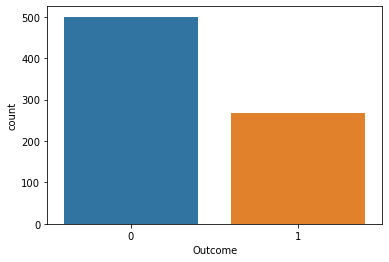

In [5]:
sns.countplot(x=df['Outcome'])

# Train Test Split

In [6]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

In [7]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [8]:
500/(500+268)

0.6510416666666666

In [9]:
375/(375+201)

0.6510416666666666

In [10]:
379/(379+197)

0.6579861111111112

# Model Training


In [11]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

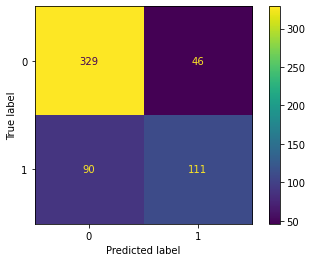

In [21]:
plot_confusion_matrix(logistic_model,x_train,y_train)

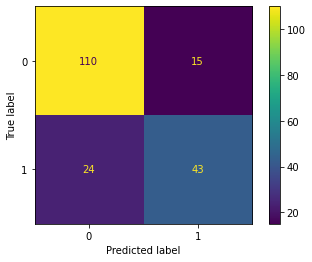

In [22]:
plot_confusion_matrix(logistic_model,x_test,y_test)

In [23]:
logistic_model.score(x_train,y_train)

0.7638888888888888

In [24]:
logistic_model.score(x_test,y_test)

0.796875

# Evaluation

In [12]:
y_pred=logistic_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*50)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score: \n",accuracy)
print("*"*50)

clf_report=classification_report(y_test,y_pred)
print("Classification Report: \n",clf_report)

Confusion Matrix: 
 [[110  15]
 [ 24  43]]
**************************************************
Accuracy Score: 
 0.796875
**************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       125
           1       0.74      0.64      0.69        67

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [13]:
y_pred=logistic_model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [18]:
y_pred_prob=logistic_model.predict_proba(x_test)
# y_pred_prob

In [19]:
# Training Data Evaluation
y_pred_train=logistic_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*50)

accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy Score: \n",accuracy)
print("*"*50)

clf_report=classification_report(y_train,y_pred_train)
print("Classification Report: \n",clf_report)

Confusion Matrix: 
 [[329  46]
 [ 90 111]]
**************************************************
Accuracy Score: 
 0.7638888888888888
**************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       375
           1       0.71      0.55      0.62       201

    accuracy                           0.76       576
   macro avg       0.75      0.71      0.72       576
weighted avg       0.76      0.76      0.76       576



In [37]:
y_pred_prob=logistic_model.predict_proba(x_train)
# y_pred_prob[:,1]
fpr,tpr,thresh=roc_curve(y_train,y_pred_prob[:,1])
# thresh

Text(0.5, 1.0, 'Receiver Operating Characteristics (ROC) Curve')

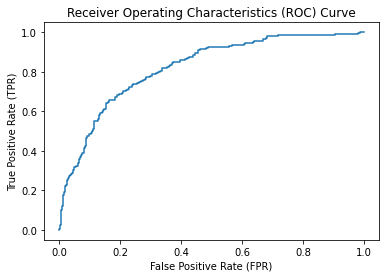

In [40]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristics (ROC) Curve")

In [49]:
y_pred_prob=logistic_model.predict_proba(x_train)
# y_pred_prob[:,1]
fpr,tpr,thresh=roc_curve(y_train,y_pred_prob[:,1])
# np.where(thresh>0.50625881)
tpr[68]

0.527363184079602

In [45]:
thresh

array([1.98389244, 0.98389244, 0.96212496, 0.9341651 , 0.93370057,
       0.8627091 , 0.85573812, 0.84396114, 0.84245762, 0.80212452,
       0.79505248, 0.79255972, 0.78820748, 0.78268217, 0.78160296,
       0.77081913, 0.77035785, 0.76385774, 0.75812303, 0.74834946,
       0.74821693, 0.74317009, 0.74262772, 0.73452082, 0.73416288,
       0.73180765, 0.72864724, 0.72350083, 0.71911478, 0.71203094,
       0.70848596, 0.70722402, 0.70690405, 0.69624178, 0.69500171,
       0.68805037, 0.6775456 , 0.66524206, 0.65654167, 0.65135253,
       0.65105551, 0.64976468, 0.64694775, 0.64536284, 0.64357485,
       0.64201463, 0.63970401, 0.6342204 , 0.63319985, 0.61818629,
       0.61587711, 0.61194574, 0.60153554, 0.58209545, 0.58200839,
       0.58014624, 0.57474349, 0.56915601, 0.55778014, 0.55673073,
       0.55062098, 0.54533842, 0.54524427, 0.53975012, 0.53300096,
       0.5243873 , 0.52260618, 0.51385887, 0.5127954 , 0.50625881,
       0.48538792, 0.48505674, 0.48295144, 0.47440125, 0.47307

In [50]:
fpr[68]

0.11466666666666667